<a href="https://colab.research.google.com/github/Alex-Hoang666/AI/blob/main/AI_W4_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5049f0c2008687fe7138bad24d4b92f893405dceabe3d4e0fdef42824fb34200
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


6.006944444444447


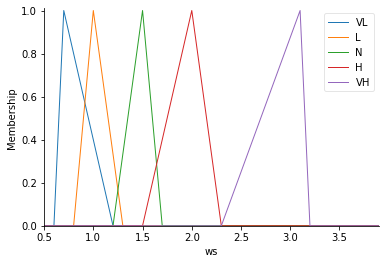

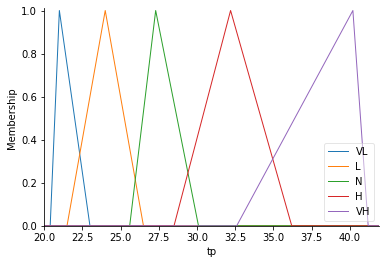

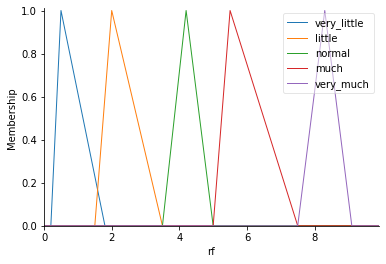

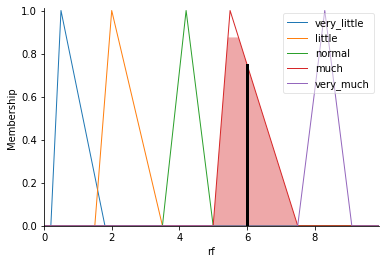

In [30]:
# Hệ thống kiểm soát lượng mưa dùng Fuzzy logic
# khởi tạo thư viện
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
universe= np.linspace(0,10,61)
#khởi tạo biến mờ 2 vào 1 ra
# wind speed as ws, temperature as tp, rainfall as rf
ws = ctrl.Antecedent(np.arange(0.5, 4, 0.1), 'ws')
tp = ctrl.Antecedent(np.arange(20, 42, 0.1), 'tp')
rf = ctrl.Consequent(np.arange(0, 10, 0.1), 'rf')
#khởi tạo dữ liệu
# Very Low (VL), Low (L), Normal (N), High(H), and Very High (VH) 
# ws min=0.7, max= 3,1 aver=3.0
ws['VL'] = fuzz.trimf(ws.universe, [0.7,0.7,1.2])
ws['L'] = fuzz.trimf(ws.universe, [0.8,1,1.3])
ws['N'] = fuzz.trimf(ws.universe, [1.2,1.5,1.7])
ws['H'] = fuzz.trimf(ws.universe, [1.5,2,2.3])
ws['VH'] = fuzz.trimf(ws.universe, [2.3,3.1,3.1])
# tp min=20.4, max= 41.2, aver=27.3
tp['VL'] = fuzz.trimf(tp.universe, [20.4,21,23])
tp['L'] = fuzz.trimf(tp.universe, [21.5,24,26.5])
tp['N'] = fuzz.trimf(tp.universe, [25.6,27.3,30.1])
tp['H'] = fuzz.trimf(tp.universe, [28.5,32.2,36.2])
tp['VH'] = fuzz.trimf(tp.universe, [32.6,40.2,41.2])
#rf min=0.2,max=9.1, aver= 3.5
rf['very_little'] = fuzz.trimf(rf.universe, [0.2,0.5,1.8])
rf['little'] = fuzz.trimf(rf.universe, [1.5,2.0,3.5])
rf['normal'] = fuzz.trimf(rf.universe, [3.5,4.2,5.0])
rf['much'] = fuzz.trimf(rf.universe, [5.0,5.5,7.5])
rf['very_much'] =  fuzz.trimf(rf.universe, [7.5,8.3,9.1])
ws.view()
tp.view()
rf.view()
# ws['high'].view()
#rule
rule1 = ctrl.Rule(ws['VL']&tp['VL'],rf['very_little'])
rule2 = ctrl.Rule(ws['VL']&tp['L'],rf['little'])
rule3 = ctrl.Rule(ws['VL']&tp['N'],rf['little'])
rule4 = ctrl.Rule(ws['VL']&tp['H'],rf['normal'])
rule5 = ctrl.Rule(ws['VL']&tp['VH'],rf['much'])

rule6 = ctrl.Rule(ws['L']&tp['VL'],rf['very_little'])
rule7 = ctrl.Rule(ws['L']&tp['L'],rf['little'])
rule8 = ctrl.Rule(ws['L']&tp['N'],rf['normal'])
rule9 = ctrl.Rule(ws['L']&tp['H'],rf['much'])
rule10 = ctrl.Rule(ws['L']&tp['VH'],rf['very_much'])

rule11 = ctrl.Rule(ws['N']&tp['VL'],rf['little'])
rule12 = ctrl.Rule(ws['N']&tp['L'],rf['little'])
rule13 = ctrl.Rule(ws['N']&tp['N'],rf['normal'])
rule14 = ctrl.Rule(ws['N']&tp['H'],rf['much'])
rule15 = ctrl.Rule(ws['N']&tp['VH'],rf['very_much'])

rule16 = ctrl.Rule(ws['H']&tp['VL'],rf['normal'])
rule17 = ctrl.Rule(ws['H']&tp['L'],rf['much'])
rule18 = ctrl.Rule(ws['H']&tp['N'],rf['much'])
rule19 = ctrl.Rule(ws['H']&tp['H'],rf['very_much'])
rule20 = ctrl.Rule(ws['H']&tp['VH'],rf['very_much'])

rule21 = ctrl.Rule(ws['VH']&tp['VL'],rf['normal'])
rule22 = ctrl.Rule(ws['VH']&tp['L'],rf['normal'])
rule23 = ctrl.Rule(ws['VH']&tp['N'],rf['much'])
rule24 = ctrl.Rule(ws['VH']&tp['H'],rf['very_much'])
rule25 = ctrl.Rule(ws['VH']&tp['VH'],rf['very_much'])
# control rainfall
rainfall_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                rule8,rule9,rule10,rule11,rule12,rule13,rule14,
                                rule15,rule16,rule17,rule18,rule19,rule20,rule21,
                                rule22,rule23,rule24,rule25])
raining = ctrl.ControlSystemSimulation(rainfall_ctrl)

raining.input['ws'] = 3
raining.input['tp'] = 27.3
raining.compute()

print(raining.output['rf'])
rf.view(sim=raining)

0.1974999999999999


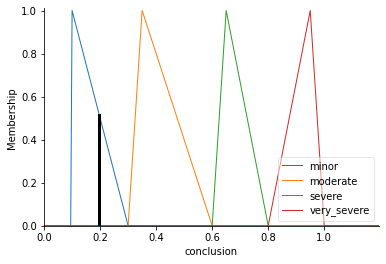

In [32]:
#Hệ thống chuẩn đoán y khoa dùng Fuzzy logic
#
# khởi tạo thư viện
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

#khởi tạo biến mờ
#input: "fever"--"headache"--"nausea"--"vomiting"--"jaundice"--" enlarge liver"--"joint pain"--"body weakness"--"dizziness"--"loss of appetite"--"MP" 
fever = ctrl.Antecedent(np.arange(0,1.1,0.05), 'fever')
headache = ctrl.Antecedent(np.arange(0,1.1,0.05), 'headache')
nausea = ctrl.Antecedent(np.arange(0,1.1,0.05), 'nausea')
vomiting = ctrl.Antecedent(np.arange(0,1.1,0.05), 'vomiting')
jaundice = ctrl.Antecedent(np.arange(0,1.1,0.05), 'jaundice')
enlarge_liver = ctrl.Antecedent(np.arange(0,1.1,0.05), 'enlarge_liver')
joint_pain = ctrl.Antecedent(np.arange(0,1.1,0.05), 'joint_pain')
body_weakness = ctrl.Antecedent(np.arange(0,1.1,0.05), 'body_weakness')
dizziness = ctrl.Antecedent(np.arange(0,1.2,0.05), 'dizziness')
loss_of_appetite = ctrl.Antecedent(np.arange(0,1.1,0.05), 'loss_of_appetite')
mp = ctrl.Antecedent(np.arange(0,1.1,0.05), 'mp')
#output: "conclusion"
conclusion = ctrl.Consequent(np.arange(0,1.2,0.005), 'conclusion')

#linguistic Variables:  "minor" "moderate" "severe" "very_severe"
fever['minor'] = fuzz.trimf(fever.universe, [0.1,0.1,0.3])
fever['moderate'] = fuzz.trimf(fever.universe, [0.3,0.35,0.6])
fever['severe'] = fuzz.trimf(fever.universe, [0.6,0.65,0.8])
fever['very_severe'] = fuzz.trimf(fever.universe, [0.8,0.95,1])

headache['minor'] = fuzz.trimf(headache.universe, [0.1,0.1,0.3])
headache['moderate'] = fuzz.trimf(headache.universe, [0.3,0.35,0.6])
headache['severe'] = fuzz.trimf(headache.universe, [0.6,0.65,0.8])
headache['very_severe'] = fuzz.trimf(headache.universe, [0.8,0.95,1])

nausea['minor'] = fuzz.trimf(nausea.universe, [0.1,0.1,0.3])
nausea['moderate'] = fuzz.trimf(nausea.universe, [0.3,0.35,0.6])
nausea['severe'] = fuzz.trimf(nausea.universe, [0.6,0.65,0.8])
nausea['very_severe'] = fuzz.trimf(nausea.universe, [0.8,0.95,1])

vomiting['minor'] = fuzz.trimf(vomiting.universe, [0.1,0.1,0.3])
vomiting['moderate'] = fuzz.trimf(vomiting.universe, [0.3,0.35,0.6])
vomiting['severe'] = fuzz.trimf(vomiting.universe, [0.6,0.65,0.8])
vomiting['very_severe'] = fuzz.trimf(vomiting.universe, [0.8,0.95,1])

jaundice['minor'] = fuzz.trimf(jaundice.universe, [0.1,0.1,0.3])
jaundice['moderate'] = fuzz.trimf(jaundice.universe, [0.3,0.35,0.6])
jaundice['severe'] = fuzz.trimf(jaundice.universe, [0.6,0.65,0.8])
jaundice['very_severe'] = fuzz.trimf(jaundice.universe, [0.8,0.95,1])

enlarge_liver['minor'] = fuzz.trimf(enlarge_liver.universe, [0.1,0.1,0.3])
enlarge_liver['moderate'] = fuzz.trimf(enlarge_liver.universe, [0.3,0.35,0.6])
enlarge_liver['severe'] = fuzz.trimf(enlarge_liver.universe, [0.6,0.65,0.8])
enlarge_liver['very_severe'] = fuzz.trimf(enlarge_liver.universe, [0.8,0.95,1])

joint_pain['minor'] = fuzz.trimf(joint_pain.universe, [0.1,0.1,0.3])
joint_pain['moderate'] = fuzz.trimf(joint_pain.universe, [0.3,0.35,0.6])
joint_pain['severe'] = fuzz.trimf(joint_pain.universe, [0.6,0.65,0.8])
joint_pain['very_severe'] = fuzz.trimf(joint_pain.universe, [0.8,0.95,1])

body_weakness['minor'] = fuzz.trimf(body_weakness.universe, [0.1,0.1,0.3])
body_weakness['moderate'] = fuzz.trimf(body_weakness.universe, [0.3,0.35,0.6])
body_weakness['severe'] = fuzz.trimf(body_weakness.universe, [0.6,0.65,0.8])
body_weakness['very_severe'] = fuzz.trimf(body_weakness.universe, [0.8,0.95,1])

dizziness['minor'] = fuzz.trimf(dizziness.universe, [0.1,0.1,0.3])
dizziness['moderate'] = fuzz.trimf(dizziness.universe, [0.3,0.35,0.6])
dizziness['severe'] = fuzz.trimf(dizziness.universe, [0.6,0.65,0.8])
dizziness['very_severe'] = fuzz.trimf(dizziness.universe, [0.8,0.95,1])

loss_of_appetite['minor'] = fuzz.trimf(loss_of_appetite.universe, [0.1,0.1,0.3])    
loss_of_appetite['moderate'] = fuzz.trimf(loss_of_appetite.universe, [0.3,0.35,0.6])
loss_of_appetite['severe'] = fuzz.trimf(loss_of_appetite.universe, [0.6,0.65,0.8])
loss_of_appetite['very_severe'] = fuzz.trimf(loss_of_appetite.universe, [0.8,0.95,1])

mp['minor'] = fuzz.trimf(mp.universe, [0.1,0.1,0.3])
mp['moderate'] = fuzz.trimf(mp.universe, [0.3,0.35,0.6])
mp['severe'] = fuzz.trimf(mp.universe, [0.6,0.65,0.8])
mp['very_severe'] = fuzz.trimf(mp.universe, [0.8,0.95,1])

conclusion['minor'] = fuzz.trimf(conclusion.universe, [0.1,0.1,0.3])
conclusion['moderate'] = fuzz.trimf(conclusion.universe, [0.3,0.35,0.6])
conclusion['severe'] = fuzz.trimf(conclusion.universe, [0.6,0.65,0.8])
conclusion['very_severe'] = fuzz.trimf(conclusion.universe, [0.8,0.95,1])

#rule
rule1 = ctrl.Rule(antecedent=((fever['minor']&headache['minor']&nausea['minor']&vomiting['minor']&jaundice['minor']&enlarge_liver['minor']&joint_pain['minor']&body_weakness['minor']&dizziness['severe']&loss_of_appetite['minor']&mp['minor'])|
                             (fever['minor']&headache['moderate']&nausea['moderate']&vomiting['minor']&jaundice['minor']&enlarge_liver['minor']&joint_pain['minor']&body_weakness['minor']&dizziness['moderate']&loss_of_appetite['minor']&mp['minor'])|
                             (fever['minor']&headache['minor']&nausea['moderate']&vomiting['moderate']&jaundice['minor']&enlarge_liver['moderate']&joint_pain['minor']&body_weakness['minor']&dizziness['minor']&loss_of_appetite['minor']&mp['minor'])),
                  consequent=conclusion['minor'],label='rule_minor')

rule2 = ctrl.Rule(antecedent=((fever['moderate']&headache['minor']&nausea['minor']&vomiting['minor']&jaundice['minor']&enlarge_liver['minor']&joint_pain['moderate']&body_weakness['moderate']&dizziness['severe']&loss_of_appetite['severe']&mp['moderate'])|
                             (fever['moderate']&headache['minor']&nausea['minor']&vomiting['moderate']&jaundice['minor']&enlarge_liver['minor']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&loss_of_appetite['severe']&mp['moderate'])|
                             (fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['moderate']&enlarge_liver['moderate']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&loss_of_appetite['moderate']&mp['moderate'])|
                             (fever['moderate']&headache['minor']&nausea['moderate']&vomiting['moderate']&jaundice['minor']&enlarge_liver['severe']&joint_pain['moderate']&body_weakness['moderate']&dizziness['severe']&loss_of_appetite['moderate']&mp['moderate'])|
                             (fever['minor']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['minor']&enlarge_liver['minor']&joint_pain['minor']&body_weakness['moderate']&dizziness['minor']&loss_of_appetite['moderate']&mp['moderate'])|
                             (fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['minor']&enlarge_liver['minor']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&loss_of_appetite['minor']&mp['moderate'])),
                  consequent=conclusion['moderate'],label='rule_moderate')

rule3 = ctrl.Rule(antecedent=((fever['severe']&headache['moderate']&nausea['minor']&vomiting['minor']&jaundice['minor']&enlarge_liver['minor']&joint_pain['minor']&body_weakness['severe']&dizziness['severe']&loss_of_appetite['severe']&mp['moderate'])|
                             (fever['minor']&headache['minor']&nausea['moderate']&vomiting['moderate']&jaundice['minor']&enlarge_liver['minor']&joint_pain['severe']&body_weakness['severe']&dizziness['moderate']&loss_of_appetite['moderate']&mp['moderate'])|
                             (fever['moderate']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['moderate']&enlarge_liver['severe']&joint_pain['moderate']&body_weakness['severe']&dizziness['moderate']&loss_of_appetite['minor']&mp['moderate'])|
                             (fever['severe']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['severe']&dizziness['moderate']&loss_of_appetite['moderate']&mp['severe'])|
                             (fever['minor']&headache['minor']&nausea['minor']&vomiting['moderate']&jaundice['minor']&enlarge_liver['minor']&joint_pain['minor']&body_weakness['severe']&dizziness['minor']&loss_of_appetite['severe']&mp['moderate'])),
                  consequent=conclusion['severe'],label='rule_severe')


rule4 = ctrl.Rule(antecedent=((fever['very_severe']&headache['minor']&nausea['minor']&vomiting['minor']&jaundice['minor']&enlarge_liver['minor']&joint_pain['severe']&body_weakness['severe']&dizziness['severe']&loss_of_appetite['minor']&mp['severe'])|
                             (fever['severe']&headache['severe']&nausea['severe']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['very_severe']&dizziness['severe']&loss_of_appetite['severe']&mp['moderate'])|
                             (fever['very_severe']&headache['moderate']&nausea['minor']&vomiting['moderate']&jaundice['severe']&enlarge_liver['moderate']&joint_pain['minor']&body_weakness['very_severe']&dizziness['severe']&loss_of_appetite['minor']&mp['moderate'])|
                             (fever['minor']&headache['very_severe']&nausea['moderate']&vomiting['moderate']&jaundice['minor']&enlarge_liver['moderate']&joint_pain['minor']&body_weakness['moderate']&dizziness['very_severe']&loss_of_appetite['minor']&mp['moderate'])|
                             (fever['moderate']&headache['very_severe']&nausea['very_severe']&vomiting['minor']&jaundice['severe']&enlarge_liver['severe']&joint_pain['moderate']&body_weakness['severe']&dizziness['very_severe']&loss_of_appetite['very_severe']&mp['severe'])|
                             (fever['very_severe']&headache['severe']&nausea['severe']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['severe']&dizziness['severe']&loss_of_appetite['minor']&mp['moderate'])),
                  consequent=conclusion['very_severe'],label='rule_very_severe')
conclusion_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
conclusioning = ctrl.ControlSystemSimulation(conclusion_ctrl)

conclusioning.input['fever'] = 0.2
conclusioning.input['headache'] = 0.2
conclusioning.input['nausea'] = 0.2
conclusioning.input['vomiting'] = 0.2
conclusioning.input['jaundice'] = 0.2
conclusioning.input['enlarge_liver'] = 0.2
conclusioning.input['joint_pain'] = 0.2
conclusioning.input['body_weakness'] = 0.2
conclusioning.input['dizziness'] = 0.6
conclusioning.input['loss_of_appetite'] = 0.2
conclusioning.input['mp'] = 0.2
conclusioning.compute()

print(conclusioning.output['conclusion'])
conclusion.view(sim=conclusioning)